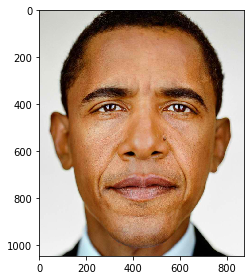

In [1]:
# Load images and choose the image to compare the others with
import skimage as ski
from skimage import io
from skimage import feature
import numpy as np
import matplotlib.pyplot as plt

images = ski.io.imread_collection('Lab3.1/*.jpg')

# Choose your image
img_ind = 0

ski.io.imshow(images[img_ind])

# Feature vectors
color_vec = [[] for i in range(12)]
lum_vec = [[] for i in range(12)]
sub_color_vec = [[] for i in range(12)]
sub_lum_vec = [[] for i in range(12)]
sub_edge_vec = [[] for i in range(12)]


In [2]:
# Image feature extraction
for i in range(len(images)):
    img = images[i]
    
    img_all_r = img[:,:,0]
    img_all_g = img[:,:,1]
    img_all_b = img[:,:,2]
    img_all_lum = ski.color.rgb2gray(img)
    
    count_all_r, _ = ski.exposure.histogram(img_all_r, nbins=16, source_range='dtype')
    count_all_g, _ = ski.exposure.histogram(img_all_g, nbins=16, source_range='dtype')
    count_all_b, _ = ski.exposure.histogram(img_all_b, nbins=16, source_range='dtype')
    count_all_lum, _ = ski.exposure.histogram(img_all_lum, nbins=16, source_range='dtype')
    
    count_all_r = count_all_r / np.linalg.norm(count_all_r)
    count_all_g = count_all_g / np.linalg.norm(count_all_g)
    count_all_b = count_all_b / np.linalg.norm(count_all_b)
    count_all_lum = count_all_lum / np.linalg.norm(count_all_lum)
    
    color_vec[i].append(count_all_r)
    color_vec[i].append(count_all_g)
    color_vec[i].append(count_all_b)
    lum_vec[i].append(count_all_lum)
    
    x, y, _ = img.shape
    n = 5
    for j in range(n):
        for k in range(n):
            
            # Color features
            img_r = img[round(j*x/n):round((j+1)*x/n), round(k*y/n):round((k+1)*y/n), 0]
            img_g = img[round(j*x/n):round((j+1)*x/n), round(k*y/n):round((k+1)*y/n), 1]
            img_b = img[round(j*x/n):round((j+1)*x/n), round(k*y/n):round((k+1)*y/n), 2]
            img_lum = ski.color.rgb2gray(img[round(j*x/n):round((j+1)*x/n), round(k*y/n):round((k+1)*y/n)])
            
            count_r, _ = ski.exposure.histogram(img_r, nbins=8, source_range='dtype')
            count_g, _ = ski.exposure.histogram(img_g, nbins=8, source_range='dtype')
            count_b, _ = ski.exposure.histogram(img_b, nbins=8, source_range='dtype')
            count_lum, _ = ski.exposure.histogram(img_lum, nbins=8, source_range='dtype')
            
            # Edge detection
            img_edge = ski.filters.prewitt(img_lum)
            if np.sum(img_edge > 0.1):
                img_edge = (img_edge - np.min(img_edge)) / (np.max(img_edge) - np.min(img_edge))
#             img_edge = img_edge > 0.5
            img_edge_mean = np.mean(img_edge)
            
            # Normalize arrays
            count_r = count_r / np.linalg.norm(count_r)
            count_g = count_g / np.linalg.norm(count_g)
            count_b = count_b / np.linalg.norm(count_b)
            count_lum = count_lum / np.linalg.norm(count_lum)

            # Append to feature vectors
            sub_color_vec[i].append(count_r)
            sub_color_vec[i].append(count_g)
            sub_color_vec[i].append(count_b)
            sub_lum_vec[i].append(count_lum)
            sub_edge_vec[i].append(img_edge_mean)


In [3]:
color_dist = []
lum_dist = []
sub_color_dist = []
sub_lum_dist = []
sub_edge_dist = []

for i in range(12):
    
    d1 = d2 = d3 = d4 = d5 = 0
    
    for j in range(len(color_vec[i])):
        d1 += np.linalg.norm(color_vec[img_ind][j]-color_vec[i][j])
        
    for j in range(len(lum_vec[i])):
        d2 += np.linalg.norm(lum_vec[img_ind][j]-lum_vec[i][j])

    for j in range(len(sub_color_vec[i])):
        d3 += np.linalg.norm(sub_color_vec[img_ind][j]-sub_color_vec[i][j])
    
    for j in range(len(sub_lum_vec[i])):
        d4 += np.linalg.norm(sub_lum_vec[img_ind][j]-sub_lum_vec[i][j])
        
    for j in range(len(sub_edge_vec[i])):
        d5 += np.linalg.norm(sub_edge_vec[img_ind][j]-sub_edge_vec[i][j])

    color_dist.append(d1)
    lum_dist.append(d2)
    sub_color_dist.append(d3)
    sub_lum_dist.append(d4)
    sub_edge_dist.append(d5)

color_ind = sorted(range(len(color_dist)), key=lambda k: color_dist[k])
lum_ind = sorted(range(len(lum_dist)), key=lambda k: lum_dist[k])
sub_color_ind = sorted(range(len(sub_color_dist)), key=lambda k: sub_color_dist[k])
sub_lum_ind = sorted(range(len(sub_lum_dist)), key=lambda k: sub_lum_dist[k])
sub_edge_ind = sorted(range(len(sub_edge_dist)), key=lambda k: sub_edge_dist[k])

In [4]:
rank = np.zeros(12)
for i in range(12):
    rank[color_ind[i]] += i*0.1
    rank[lum_ind[i]] += i*0.1
    rank[sub_color_ind[i]] += i*0.1
    rank[sub_lum_ind[i]] += i*0.1
    rank[sub_edge_ind[i]] += i*0.4
    
rank_ind = sorted(range(len(rank)), key=lambda k: rank[k])

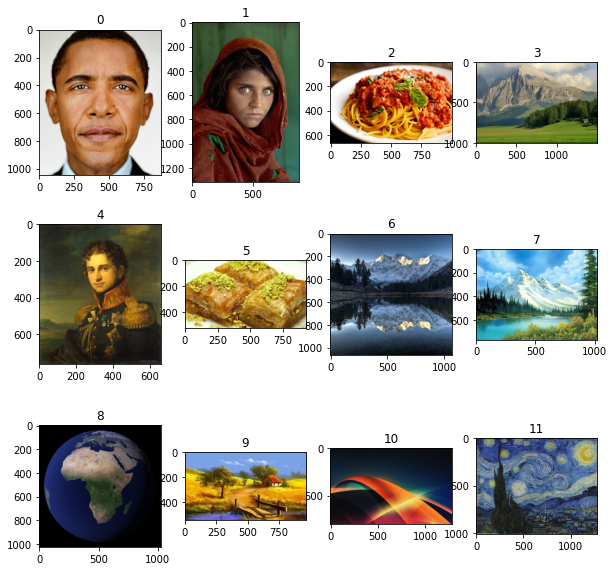

In [5]:
fig=plt.figure(figsize=(10,10))
for i in range(12):
    fig.add_subplot(3,4,i+1)
    plt.imshow(images[rank_ind[i]])
    plt.title(i)
plt.show()